## Dataset Description

### Etiquetas

El conjunto de datos se proporciona en formato CSV (train.csv) y contiene información sobre 732 pacientes con diferentes grados de enfermedad (1-4) o ausencia de la misma (0). Este dato puede obtenerse de la columna 'label'.

### Características

Además, el conjunto de datos está compuesto por 13 características adicionales que describen las condiciones de salud de cada uno de los pacientes. Estas características se describen a continuación:

1. **age**: Edad del paciente.
2. **sex**: Sexo del paciente.
3. **cp**: Tipo de dolor de pecho:
   - 1: Angina típica
   - 2: Angina atípica
   - 3: Dolor no-anginoso
   - 4: Asintomático
4. **trestbps**: Presión arterial en reposo (en mm Hg al ingreso en el hospital).
5. **chol**: Colesterol sérico en mg/dl.
6. **fbs**: Dolor provocado por el esfuerzo (1 = sí; 0 = no).
7. **restecg**: Resultados electrocardiográficos en reposo:
   - 0: Normal
   - 1: Presenta anormalidad de la onda ST-T
   - 2: Presenta probable o definida hipertrofía ventricular izquierda
8. **thalach**: Frecuencia cardiaca en reposo.
9. **exang**: Angina inducida por el ejercicio (1 = sí; 0 = no).
10. **oldpeak**: Depresión del ST inducida por el ejercicio en relación con el reposo.
11. **slope**: La pendiente del segmento ST en ejercicio máximo:
    - 1: Pendiente ascendente
    - 2: Plano
    - 3: Pendiente descendente
12. **ca**: Número de vasos mayores (0-3) coloreados por fluoroscopía.
13. **thal**:
    - 3: Normal
    - 6: Defecto fijo
    - 7: Defecto reversible


## 1- Analisis exploratorio

### A - Análisis descriptivo del dataset de entrenamiento (TRAIN)

In [556]:
import pandas as pd
train = pd.read_csv("train.csv")
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46.0,1.0,3.0,120.0,230.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0,0
728,62.0,1.0,3.0,?,204,0,1.0,?,?,?,?,?,?,1
729,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0,0
730,68.0,1.0,3.0,150,195,1,0.0,132,0,0,?,?,6,1


In [557]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


In [558]:
train.describe()

,age,sex,cp,restecg,label
count,732.000000,732.000000,732.000000,732.000000,732.000000
mean,53.364754,0.789617,3.250000,0.602459,1.132514
std,9.306868,0.407859,0.923363,0.802966,1.257615
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,0.000000,1.000000
75%,60.000000,1.000000,4.000000,1.000000,2.000000
max,76.000000,1.000000,4.000000,2.000000,4.000000


In [559]:
# Contar la cantidad de filas con valores faltantes
missing_values_count = train[train == '?'].count()

# Ordenar los valores de mayor a menor
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

# Mostrar el conteo de valores faltantes por característica ordenados
print("Valores faltantes por variable en TRAIN:")
print(missing_values_count_sorted)

# Calcular el porcentaje de valores faltantes por característica
missing_percentage = (missing_values_count_sorted / len(train)) * 100

# Mostrar el porcentaje de valores faltantes por característica
print("\nPorcentaje de valores faltantes por variable en TRAIN:")
print(missing_percentage)

Valores faltantes por variable en TRAIN:
ca          249
thal        169
slope        95
fbs          58
oldpeak      49
trestbps     47
thalach      44
exang        44
chol          5
age           0
sex           0
cp            0
restecg       0
label         0
dtype: int64

Porcentaje de valores faltantes por variable en TRAIN:
ca          34.016393
thal        23.087432
slope       12.978142
fbs          7.923497
oldpeak      6.693989
trestbps     6.420765
thalach      6.010929
exang        6.010929
chol         0.683060
age          0.000000
sex          0.000000
cp           0.000000
restecg      0.000000
label        0.000000
dtype: float64


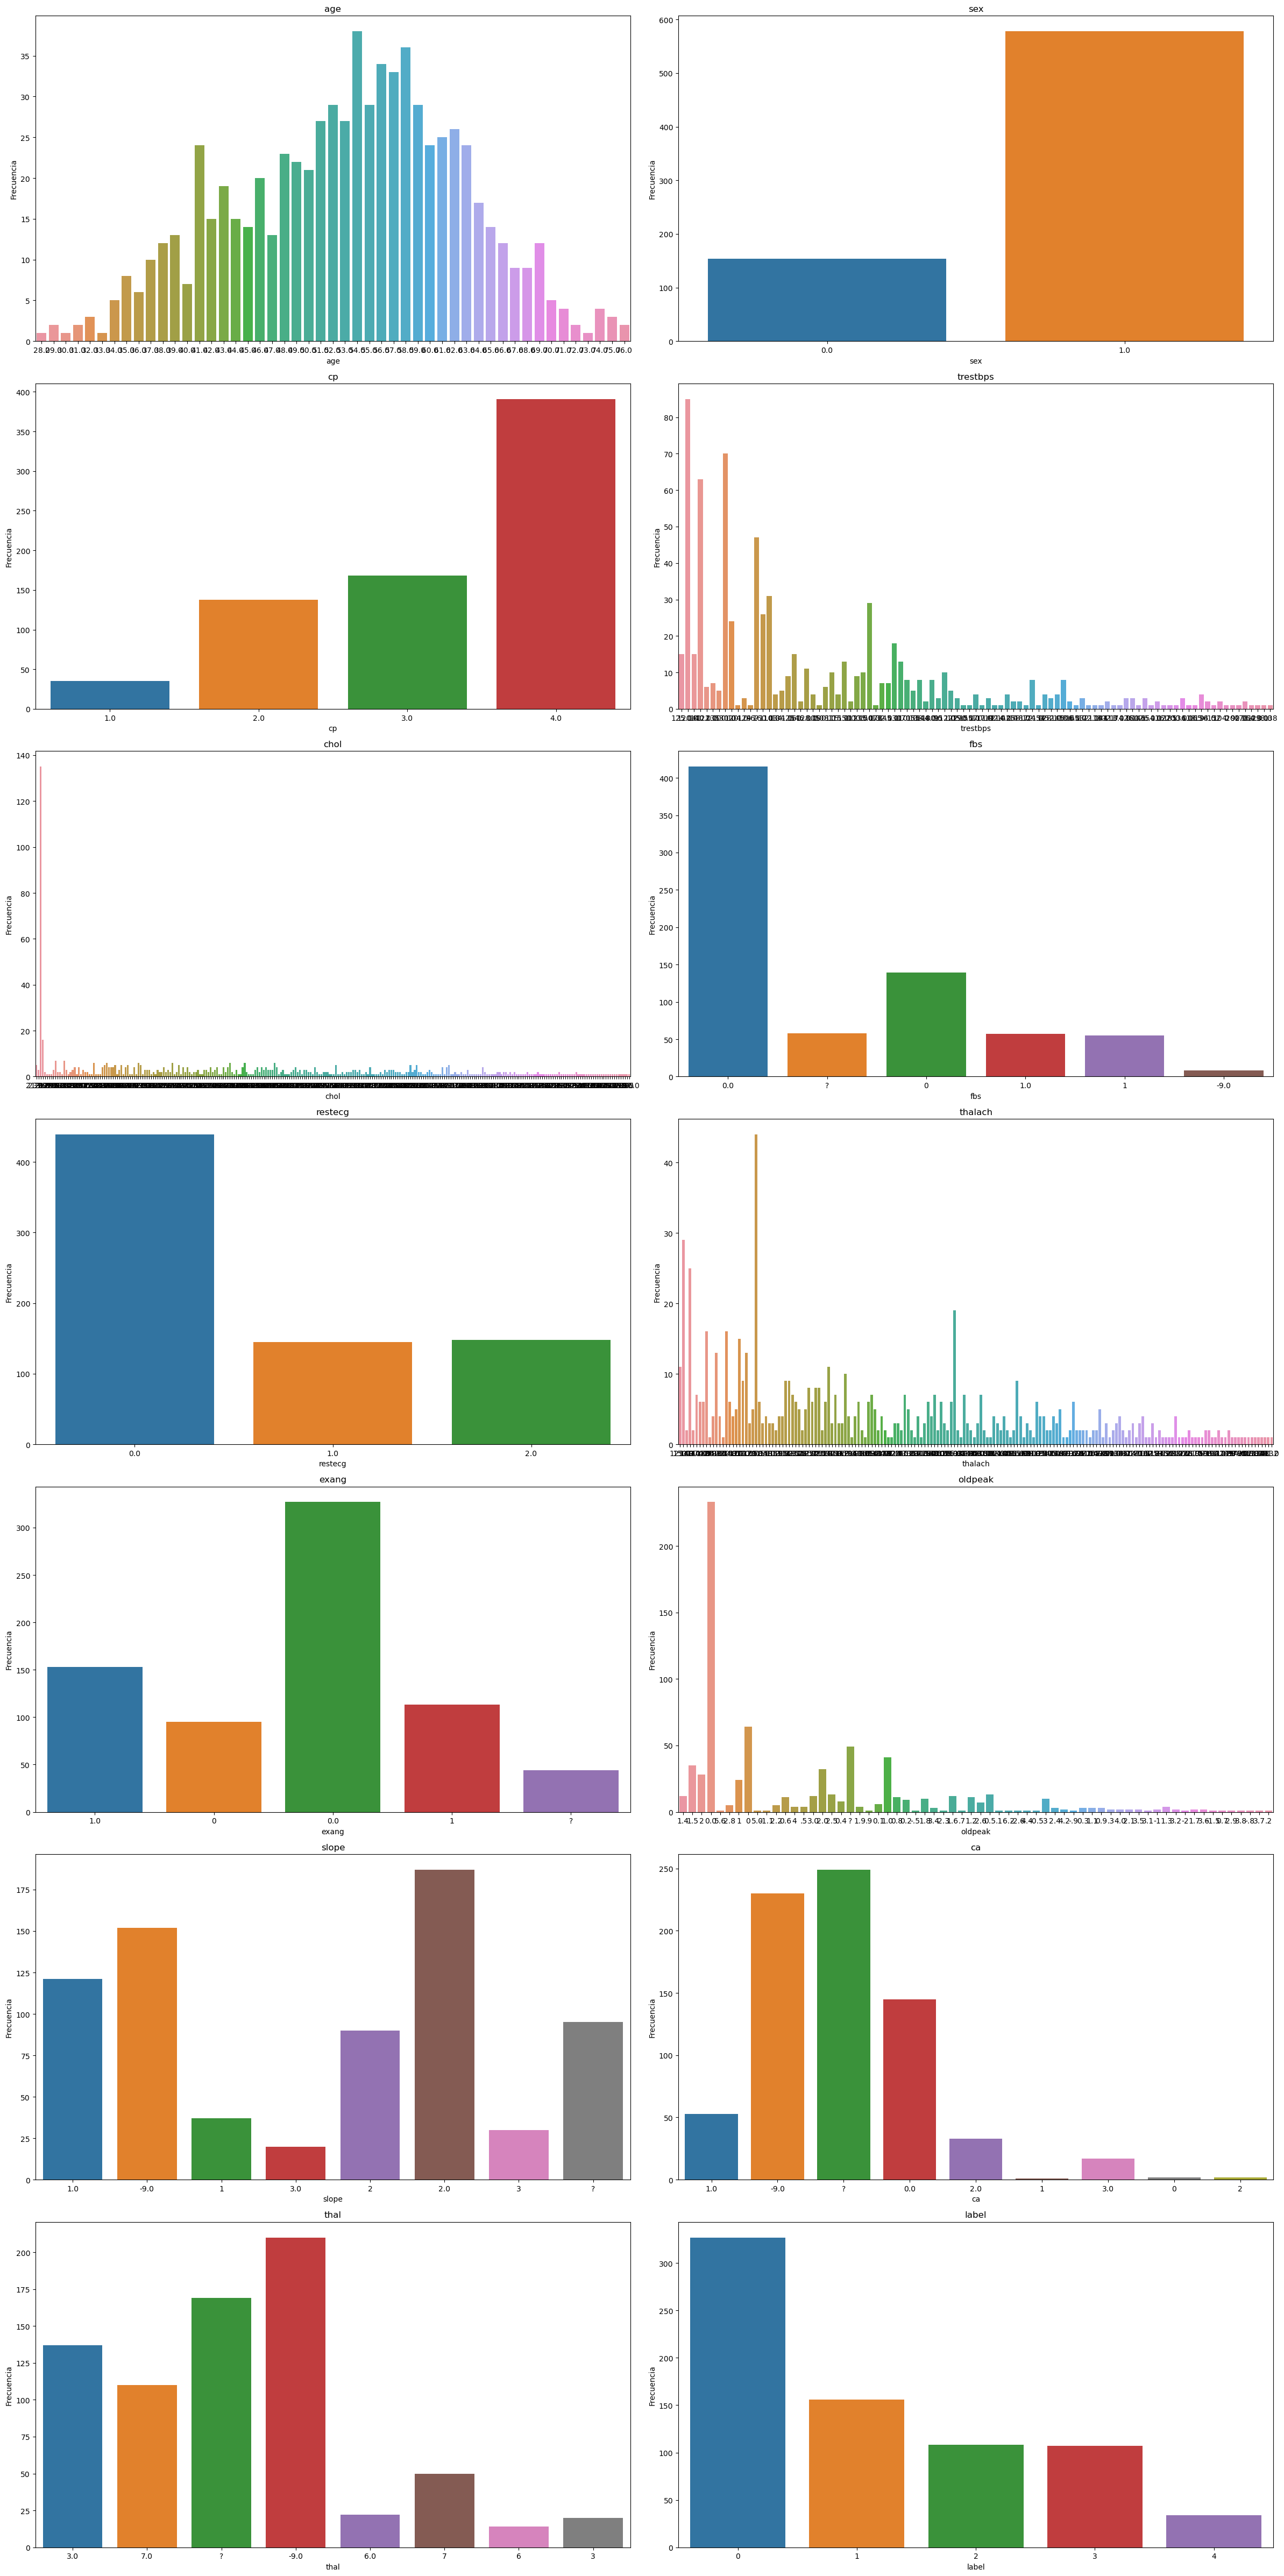

In [560]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']

# Subgráficos
num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=train, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### B - Análisis descriptivo del dataset de testeo (TEST)

In [561]:
test = pd.read_csv("test.csv")
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,4.0,156,173,0,2,119,1,3,3,?,?
1,52.0,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,-9.0,-9.0,-9.0
2,48.0,1.0,2.0,100.0,-9.0,0.0,0.0,100.0,0.0,0.0,-9.0,-9.0,-9.0
3,62.0,1.0,4.0,115,0,?,0,128,1,2.5,3,?,?
4,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,-9.0,-9.0
180,55.0,1.0,2.0,110,214,1,1,180,0,?,?,?,?
181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0
182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0


In [562]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    float64
 1   sex       184 non-null    float64
 2   cp        184 non-null    float64
 3   trestbps  184 non-null    object 
 4   chol      184 non-null    object 
 5   fbs       184 non-null    object 
 6   restecg   184 non-null    object 
 7   thalach   184 non-null    object 
 8   exang     184 non-null    object 
 9   oldpeak   184 non-null    object 
 10  slope     184 non-null    object 
 11  ca        184 non-null    object 
 12  thal      184 non-null    object 
dtypes: float64(3), object(10)
memory usage: 18.8+ KB


In [563]:
# Contar la cantidad de filas con valores faltantes
missing_values_count = test[test == '?'].count()

# Ordenar los valores de mayor a menor
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

# Mostrar el conteo de valores faltantes por característica ordenados
print("Valores faltantes por variable en TEST:")
print(missing_values_count_sorted)

# Calcular el porcentaje de valores faltantes por característica
missing_percentage = (missing_values_count_sorted / len(test)) * 100

# Mostrar el porcentaje de valores faltantes por característica
print("\nPorcentaje de valores faltantes por variable en TEST:")
print(missing_percentage)

Valores faltantes por variable en TEST:
ca          69
thal        49
slope       24
fbs         23
oldpeak     13
trestbps    11
thalach     10
exang       10
chol         2
restecg      1
age          0
sex          0
cp           0
dtype: int64

Porcentaje de valores faltantes por variable en TEST:
ca          37.500000
thal        26.630435
slope       13.043478
fbs         12.500000
oldpeak      7.065217
trestbps     5.978261
thalach      5.434783
exang        5.434783
chol         1.086957
restecg      0.543478
age          0.000000
sex          0.000000
cp           0.000000
dtype: float64


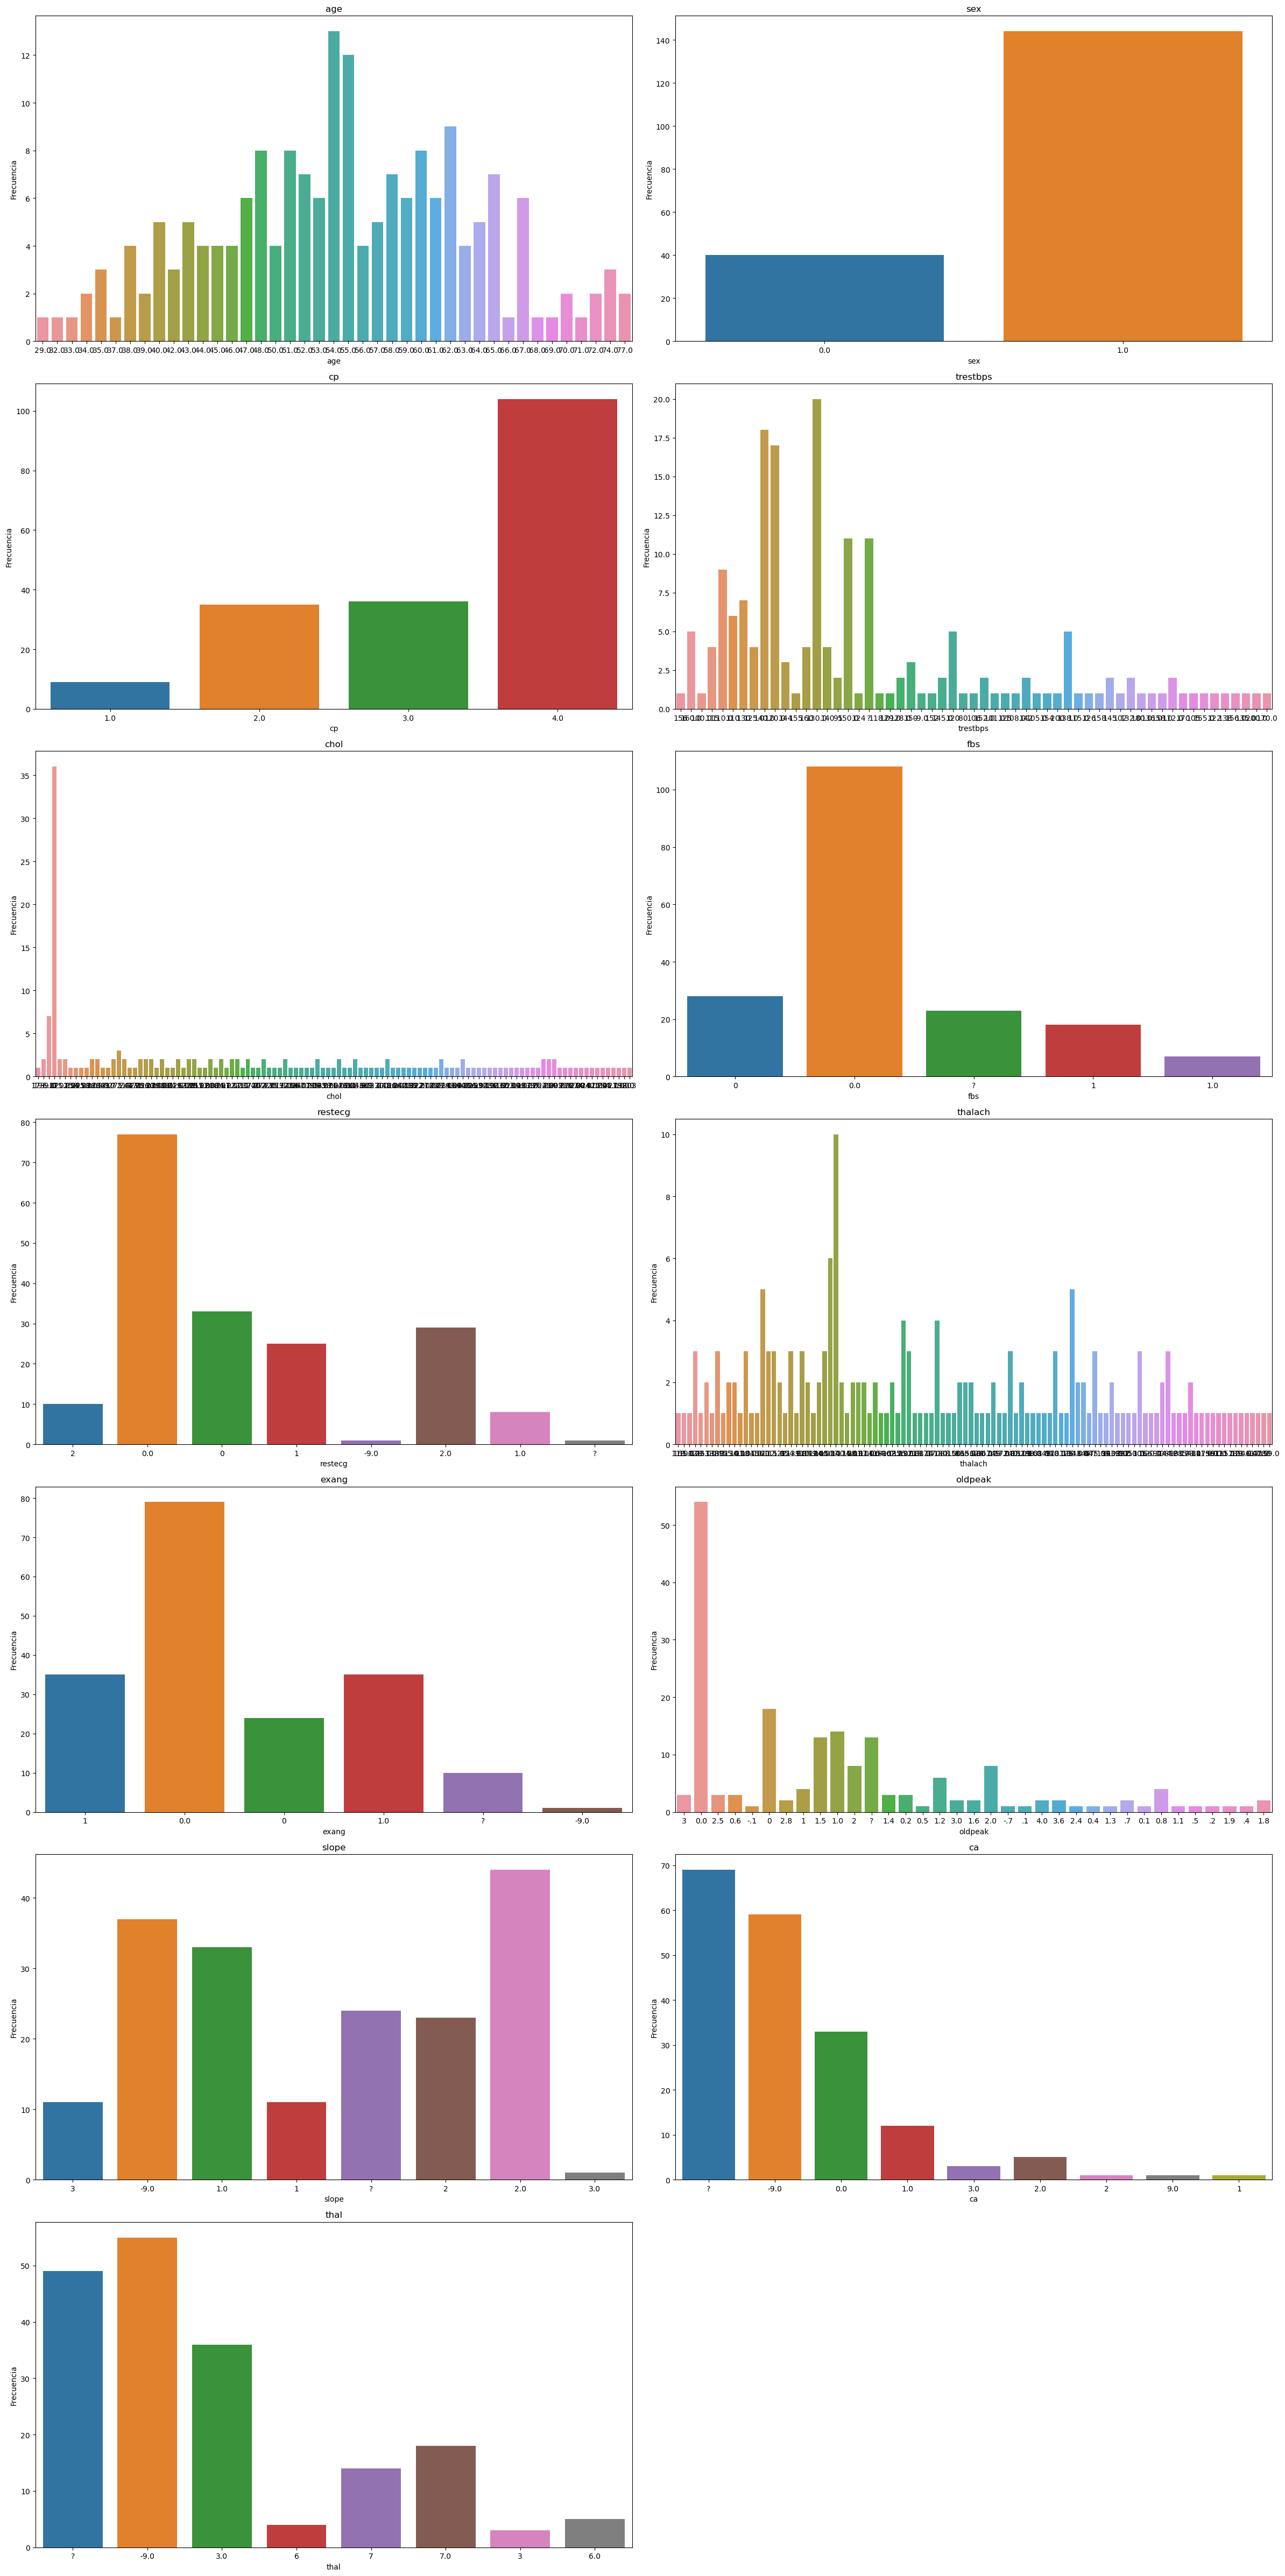

In [564]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Subgráficos
num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=test, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

## 2 -Tratamiento del dataset

### A- Transformaciones dataset TRAIN

Definicion de datatypes

In [565]:
train = pd.read_csv("train.csv")
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46.0,1.0,3.0,120.0,230.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0,0
728,62.0,1.0,3.0,?,204,0,1.0,?,?,?,?,?,?,1
729,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0,0
730,68.0,1.0,3.0,150,195,1,0.0,132,0,0,?,?,6,1


In [566]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


In [567]:
import numpy as np
import pandas as pd

# Reemplazar '?' con NaN 
train = train.replace('?', np.nan)

# Convertir variables discretas a numericas
int_cols = ['age', 'label', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
train[int_cols] = train[int_cols].apply(pd.to_numeric, errors='coerce')

# Convertir variables a continuas a numericas
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
train[float_cols] = train[float_cols].apply(pd.to_numeric, errors='coerce')

# Iterar sobre las columnas numéricas y reemplazar los valores negativos con NaN
for col in int_cols + float_cols:
    train[col] = train[col].apply(lambda x: np.nan if pd.isnull(x) or x < 0 else x)

# Convertir las columnas discretas a int
train[int_cols] = train[int_cols].astype('Int64') 

# Verificar la información del DataFrame
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    Int64  
 1   sex       732 non-null    Int64  
 2   cp        732 non-null    Int64  
 3   trestbps  685 non-null    float64
 4   chol      711 non-null    float64
 5   fbs       666 non-null    Int64  
 6   restecg   732 non-null    Int64  
 7   thalach   688 non-null    float64
 8   exang     688 non-null    Int64  
 9   oldpeak   673 non-null    float64
 10  slope     485 non-null    Int64  
 11  ca        253 non-null    Int64  
 12  thal      353 non-null    Int64  
 13  label     732 non-null    Int64  
dtypes: Int64(10), float64(4)
memory usage: 87.3 KB


In [568]:
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0,2,125.0,1,1.4,1,1,3,0
1,54,1,3,120.0,237.0,0,0,150.0,1,1.5,<NA>,<NA>,7,2
2,63,1,4,140.0,0.0,<NA>,2,149.0,0,2.0,1,<NA>,<NA>,2
3,52,0,2,140.0,NaN,0,0,140.0,0,0.0,<NA>,<NA>,<NA>,0
4,55,1,4,140.0,217.0,0,0,111.0,1,5.6,3,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1,3,120.0,230.0,0,0,150.0,0,0.0,<NA>,<NA>,<NA>,0
728,62,1,3,NaN,204.0,0,1,NaN,<NA>,NaN,<NA>,<NA>,<NA>,1
729,43,0,3,122.0,213.0,0,0,165.0,0,0.2,2,0,3,0
730,68,1,3,150.0,195.0,1,0,132.0,0,0.0,<NA>,<NA>,6,1


**Opcion 1** - Reemplazo de ***valores faltantes NaN*** por la mediana en las variables float y por la moda en las variables int 


In [569]:
# Copia df
train_copy_a =  train.copy()


# Iterar sobre las columnas int y reemplazar los NaN con el valor más frecuente
for col in int_cols:
    train_copy_a[col].fillna(train_copy_a[col].mode()[0], inplace=True)


# Iterar sobre las columnas float y reemplazar los NaN con la media
for col in float_cols:
    train_copy_a[col].fillna(train_copy_a[col].median(), inplace=True)

Comprobacion de ausencia de valores nulos e integridad del dataset

In [570]:
train_copy_a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    Int64  
 1   sex       732 non-null    Int64  
 2   cp        732 non-null    Int64  
 3   trestbps  732 non-null    float64
 4   chol      732 non-null    float64
 5   fbs       732 non-null    Int64  
 6   restecg   732 non-null    Int64  
 7   thalach   732 non-null    float64
 8   exang     732 non-null    Int64  
 9   oldpeak   732 non-null    float64
 10  slope     732 non-null    Int64  
 11  ca        732 non-null    Int64  
 12  thal      732 non-null    Int64  
 13  label     732 non-null    Int64  
dtypes: Int64(10), float64(4)
memory usage: 87.3 KB


**Opcion 2** - KNN (K-Nearest Neighbors): imputa los valores faltantes utilizando los valores de las observaciones más similares en función de otras variables. Calcula los vecinos más cercanos y usar sus valores para imputar los valores faltantes. Se aplica solo a variables float

In [571]:
from sklearn.impute import KNNImputer

#Copia del df
train_copy_b =  train.copy()


# Imputar valores faltantes para variables float
numeric_imputer = KNNImputer()
numeric_imputed_data = numeric_imputer.fit_transform(train_copy_b[float_cols])
numeric_imputed_df = pd.DataFrame(numeric_imputed_data, columns=float_cols)

# Imputar valores faltantes con la moda para variables int
categorical_imputed_df = train_copy_b[int_cols].fillna(train_copy_b.mode().iloc[0])

# Combinar las variables float y int imputadas
train_copy_b = pd.concat([numeric_imputed_df, categorical_imputed_df], axis=1)

# Verificar si hay valores faltantes después de la imputación
train_copy_b


,trestbps,chol,thalach,oldpeak,age,label,sex,cp,restecg,ca,exang,fbs,slope,thal
0,125.0,213.0,125.0,1.40,51,0,1,1,2,1,1,0,1,3
1,120.0,237.0,150.0,1.50,54,2,1,3,0,0,1,0,2,7
2,140.0,0.0,149.0,2.00,63,2,1,4,2,0,0,0,1,7
3,140.0,238.2,140.0,0.00,52,0,0,2,0,0,0,0,2,7
4,140.0,217.0,111.0,5.60,55,3,1,4,0,0,1,0,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,120.0,230.0,150.0,0.00,46,0,1,3,0,0,0,0,2,7
728,125.2,204.0,164.8,0.46,62,1,1,3,1,0,0,0,2,7
729,122.0,213.0,165.0,0.20,43,0,0,3,0,0,0,0,2,3
730,150.0,195.0,132.0,0.00,68,1,1,3,0,0,0,1,2,6


**Opcion 3** Reemplazo de valores faltantes por la mediana o moda, y eliminacion de outliers 

In [572]:
from sklearn.impute import KNNImputer

# Copia del DataFrame
train_copy_c = train.copy()

#complete_cols = ['age', 'label', 'sex', 'cp', 'restecg','thalach','exang']

# Iterar sobre las columnas int y reemplazar los NaN con el valor más frecuente
for col in int_cols:
    train_copy_c[col].fillna(train_copy_c[col].mode()[0], inplace=True)


# Iterar sobre las columnas float y reemplazar los NaN con la media
for col in float_cols:
    train_copy_c[col].fillna(train_copy_c[col].median(), inplace=True)

#train_copy_c = train_copy_c[complete_cols]

# Calcula el rango intercuartílico (IQR) para cada variable continua
Q1 = train_copy_c[float_cols].quantile(0.25)
Q3 = train_copy_c[float_cols].quantile(0.75)
IQR = Q3 - Q1

# Define un umbral para identificar valores atípicos
threshold = 1.5

# Identifica valores atípicos para cada variable continua
outliers = (train_copy_c[float_cols] < (Q1 - threshold * IQR)) | (train_copy_c[float_cols] > (Q3 + threshold * IQR))

# Elimina filas que contengan valores atípicos en al menos una variable continua
train_copy_c_no_outliers = train_copy_c[~outliers.any(axis=1)]

# Muestra el nuevo conjunto de datos sin valores atípicos
train_copy_c_no_outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0,2,125.0,1,1.4,1,1,3,0
1,54,1,3,120.0,237.0,0,0,150.0,1,1.5,2,0,7,2
3,52,0,2,140.0,223.0,0,0,140.0,0,0.0,2,0,7,0
5,44,1,4,120.0,169.0,0,0,144.0,1,2.8,3,0,6,2
6,35,1,2,122.0,192.0,0,0,174.0,0,0.0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1,3,120.0,230.0,0,0,150.0,0,0.0,2,0,7,0
728,62,1,3,130.0,204.0,0,1,140.0,0,0.5,2,0,7,1
729,43,0,3,122.0,213.0,0,0,165.0,0,0.2,2,0,3,0
730,68,1,3,150.0,195.0,1,0,132.0,0,0.0,2,0,6,1


**Opcion 4** eliminacion de valores atipicos y Imputacion con KNN

In [573]:
from sklearn.impute import KNNImputer

#Copia del df
train_copy_d =  train.copy()


# Imputar valores faltantes para variables float
numeric_imputer = KNNImputer()
numeric_imputed_data = numeric_imputer.fit_transform(train_copy_d[float_cols])
numeric_imputed_df = pd.DataFrame(numeric_imputed_data, columns=float_cols)

# Imputar valores faltantes con la moda para variables int
categorical_imputed_df = train_copy_d[int_cols].fillna(train_copy_d.mode().iloc[0])

# Combinar las variables float y int imputadas
train_copy_d = pd.concat([categorical_imputed_df, numeric_imputed_df], axis=1)

# Calcula el rango intercuartílico (IQR) para cada variable continua
Q1 = train_copy_d[float_cols].quantile(0.25)
Q3 = train_copy_d[float_cols].quantile(0.75)
IQR = Q3 - Q1

# Define un umbral para identificar valores atípicos
threshold = 1.5

# Identifica valores atípicos para cada variable continua
outliers = (train_copy_d[float_cols] < (Q1 - threshold * IQR)) | (train_copy_d[float_cols] > (Q3 + threshold * IQR))

# Elimina filas que contengan valores atípicos en al menos una variable continua
train_copy_d_no_outliers = train_copy_d[~outliers.any(axis=1)]

# Muestra el nuevo conjunto de datos sin valores atípicos
train_copy_d_no_outliers = train_copy_d_no_outliers[train.columns]
train_copy_d_no_outliers


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0,2,125.0,1,1.40,1,1,3,0
1,54,1,3,120.0,237.0,0,0,150.0,1,1.50,2,0,7,2
3,52,0,2,140.0,238.2,0,0,140.0,0,0.00,2,0,7,0
5,44,1,4,120.0,169.0,0,0,144.0,1,2.80,3,0,6,2
6,35,1,2,122.0,192.0,0,0,174.0,0,0.00,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1,3,120.0,230.0,0,0,150.0,0,0.00,2,0,7,0
728,62,1,3,125.2,204.0,0,1,164.8,0,0.46,2,0,7,1
729,43,0,3,122.0,213.0,0,0,165.0,0,0.20,2,0,3,0
730,68,1,3,150.0,195.0,1,0,132.0,0,0.00,2,0,6,1


Graficos de distribución

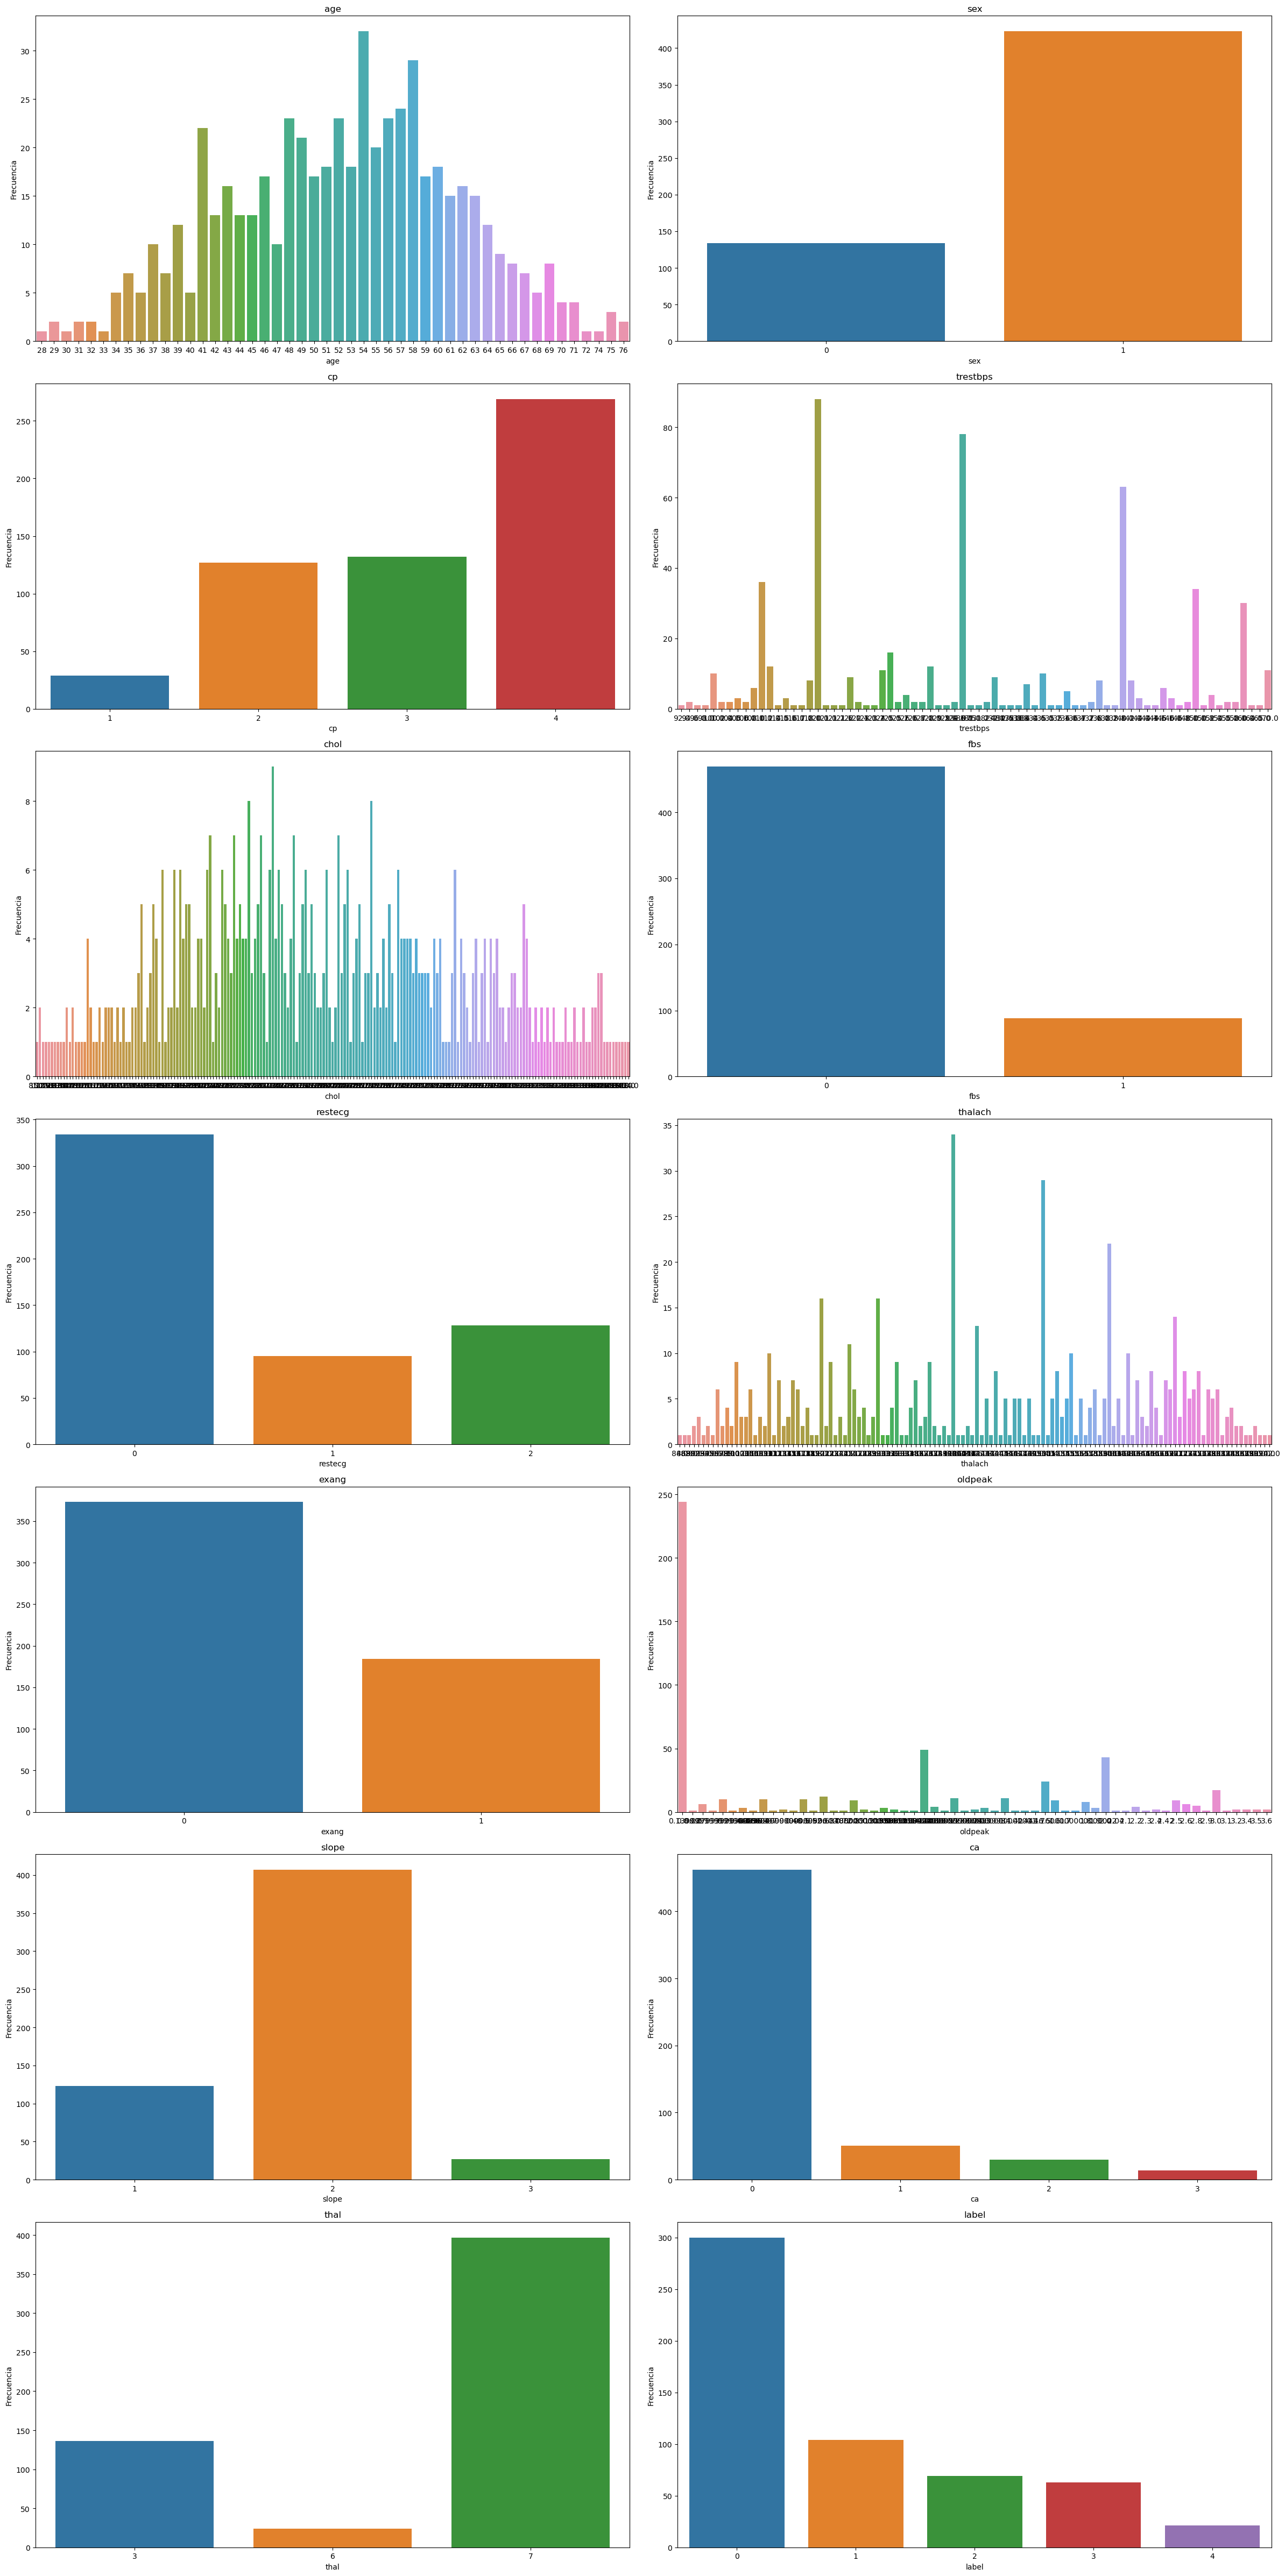

In [574]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']

# Subgráficos
num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=train_copy_d_no_outliers, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### B- Transformaciones dataset TEST

Definicion de datatypes

In [575]:
test = pd.read_csv("test.csv")

In [576]:
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,4.0,156,173,0,2,119,1,3,3,?,?
1,52.0,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,-9.0,-9.0,-9.0
2,48.0,1.0,2.0,100.0,-9.0,0.0,0.0,100.0,0.0,0.0,-9.0,-9.0,-9.0
3,62.0,1.0,4.0,115,0,?,0,128,1,2.5,3,?,?
4,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,-9.0,-9.0
180,55.0,1.0,2.0,110,214,1,1,180,0,?,?,?,?
181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0
182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0


In [577]:
import numpy as np

# Reemplazar '?' con NaN 
test = test.replace('?', np.nan)

# Convertir variables discretas a numericas
int_cols = ['age', 'sex', 'cp', 'restecg', 'ca', 'exang', 'fbs', 'slope', 'thal']
test[int_cols] = test[int_cols].apply(pd.to_numeric, errors='coerce')

# Convertir variables a continuas a numericas
float_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
test[float_cols] = test[float_cols].apply(pd.to_numeric, errors='coerce')

# Iterar sobre las columnas numéricas y reemplazar los valores negativos con NaN
for col in int_cols + float_cols:
    test[col] = test[col].apply(lambda x: np.nan if pd.isnull(x) or x < 0 else x)

# Convertir las columnas discretas a int
test[int_cols] = test[int_cols].astype('Int64') 

# Verificar la información del DataFrame
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    Int64  
 1   sex       184 non-null    Int64  
 2   cp        184 non-null    Int64  
 3   trestbps  172 non-null    float64
 4   chol      175 non-null    float64
 5   fbs       161 non-null    Int64  
 6   restecg   182 non-null    Int64  
 7   thalach   173 non-null    float64
 8   exang     173 non-null    Int64  
 9   oldpeak   169 non-null    float64
 10  slope     123 non-null    Int64  
 11  ca        56 non-null     Int64  
 12  thal      80 non-null     Int64  
dtypes: Int64(9), float64(4)
memory usage: 20.4 KB


Reemplazo de ***valores faltantes NaN*** por la media en las variables float e int, y por la moda en las variables cat


In [578]:
from sklearn.impute import KNNImputer

#Copia del df
test_copy_a =  test.copy()

# Iterar sobre las columnas int y reemplazar los NaN con el valor más frecuente
for col in int_cols:
    test_copy_a[col].fillna(test_copy_a[col].mode()[0], inplace=True)


# Iterar sobre las columnas float y reemplazar los NaN con la media
for col in float_cols:
    test_copy_a[col].fillna(test_copy_a[col].median(), inplace=True)
    
    
test_copy_a

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,4,156.0,173.0,0,2,119.0,1,3.0,3,0,3
1,52,1,2,160.0,196.0,0,0,165.0,0,0.0,2,0,3
2,48,1,2,100.0,221.0,0,0,100.0,0,0.0,2,0,3
3,62,1,4,115.0,0.0,0,0,128.0,1,2.5,3,0,3
4,51,1,3,110.0,175.0,0,0,123.0,0,0.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,4,200.0,198.0,0,0,142.0,1,2.0,2,0,3
180,55,1,2,110.0,214.0,1,1,180.0,0,0.6,2,0,3
181,67,1,3,152.0,212.0,0,2,150.0,0,0.8,2,0,7
182,59,1,1,170.0,288.0,0,2,159.0,0,0.2,2,0,7


KNN (K-Nearest Neighbors)

In [579]:
from sklearn.impute import KNNImputer

#Copia del df
test_copy_b =  test.copy()


# Imputar valores faltantes para variables float
numeric_imputer = KNNImputer()
numeric_imputed_data = numeric_imputer.fit_transform(test_copy_b[float_cols])
numeric_imputed_df = pd.DataFrame(numeric_imputed_data, columns=float_cols)

# Imputar valores faltantes con la moda para variables int
categorical_imputed_df = test_copy_b[int_cols].fillna(test_copy_b.mode().iloc[0])

# Combinar las variables float y int imputadas
test_copy_b = pd.concat([numeric_imputed_df, categorical_imputed_df], axis=1)

# Verificar si hay valores faltantes después de la imputación
test_copy_b


,trestbps,chol,thalach,oldpeak,age,sex,cp,restecg,ca,exang,fbs,slope,thal
0,156.0,173.0,119.0,3.00,57,1,4,2,0,1,0,3,3
1,160.0,196.0,165.0,0.00,52,1,2,0,0,0,0,2,3
2,100.0,104.2,100.0,0.00,48,1,2,0,0,0,0,2,3
3,115.0,0.0,128.0,2.50,62,1,4,0,0,1,0,3,3
4,110.0,175.0,123.0,0.60,51,1,3,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,200.0,198.0,142.0,2.00,54,1,4,0,0,1,0,2,3
180,110.0,214.0,180.0,0.44,55,1,2,1,0,0,1,2,3
181,152.0,212.0,150.0,0.80,67,1,3,2,0,0,0,2,7
182,170.0,288.0,159.0,0.20,59,1,1,2,0,0,0,2,7


## 3 -Entrenamiento del Modelo

In [580]:
train_copy_c_no_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0,2,125.0,1,1.4,1,1,3,0
1,54,1,3,120.0,237.0,0,0,150.0,1,1.5,2,0,7,2
3,52,0,2,140.0,223.0,0,0,140.0,0,0.0,2,0,7,0
5,44,1,4,120.0,169.0,0,0,144.0,1,2.8,3,0,6,2
6,35,1,2,122.0,192.0,0,0,174.0,0,0.0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1,3,120.0,230.0,0,0,150.0,0,0.0,2,0,7,0
728,62,1,3,130.0,204.0,0,1,140.0,0,0.5,2,0,7,1
729,43,0,3,122.0,213.0,0,0,165.0,0,0.2,2,0,3,0
730,68,1,3,150.0,195.0,1,0,132.0,0,0.0,2,0,6,1


Eleccion de modelo

In [581]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Identificar las filas con valores negativos
#valores_negativos = (train < 0).any(axis=1)

#Eliminar las filas con valores negativos
#train = train[~valores_negativos]

#Seleccion del df para entrenar al modelo
df_train = train_copy_d_no_outliers
##########################################################################


# Separacion entre Label y las variables independientes
X = df_train.drop('label', axis=1)  # Variables independientes
y = df_train['label']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

# Entrenar y evaluar cada modelo
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, MSE: {mse}, R2: {r2}")

Model: LinearRegression, MSE: 0.9316443600992005, R2: 0.4127363390409863
Model: Ridge, MSE: 0.9318810656731082, R2: 0.4125871312661572
Model: Lasso, MSE: 1.3583861665108787, R2: 0.14373889081846902
Model: DecisionTreeRegressor, MSE: 1.9910714285714286, R2: -0.2550753768844225
Model: RandomForestRegressor, MSE: 1.0339803571428572, R2: 0.34822866331658275


Entrenamiento de modelo de ***regresion lineal***

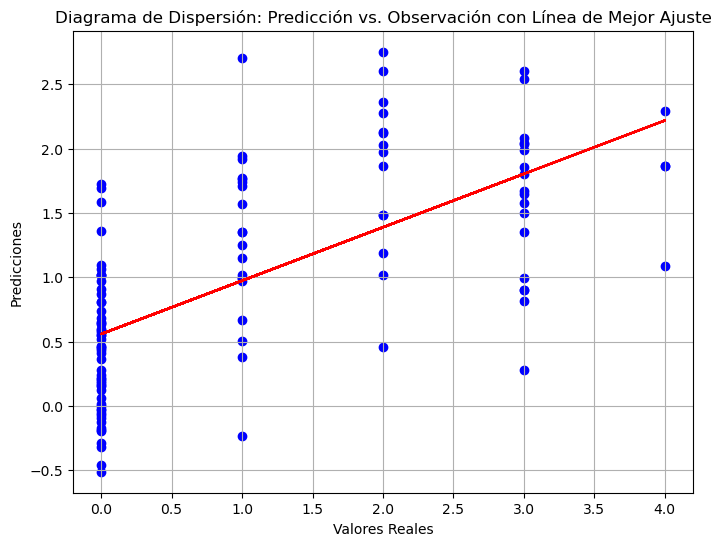

Error cuadrático medio en conjunto de entrenamiento: 0.7594012541444892
Error cuadrático medio en conjunto de prueba: 0.9316443600992005
R2 train 0.4608783615167549
R2 test 0.4127363390409863


In [582]:
# Paso 1: Seleccionar y entrenar el modelo de regresión
model = LinearRegression()  
model = model.fit(X_train, y_train)

# Paso 2: Evaluar el rendimiento del modelo
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#Metricas de performance
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

valores_reales = y_test

# Paso 3: Graficar
# Calcular la regresión lineal entre los valores reales y las predicciones
model_chart = model
model_chart.fit(valores_reales.to_numpy().reshape(-1, 1), test_predictions)

# Obtener los coeficientes de la regresión lineal
pendiente = model_chart.coef_[0]
intercepto = model_chart.intercept_

# Crear el diagrama de dispersión con la línea de mejor ajuste
plt.figure(figsize=(8, 6))
plt.scatter(valores_reales, test_predictions, color='blue')
plt.plot(valores_reales, pendiente * valores_reales + intercepto, color='red')  # Línea de mejor ajuste
plt.title('Diagrama de Dispersión: Predicción vs. Observación con Línea de Mejor Ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

print("Error cuadrático medio en conjunto de entrenamiento:", train_mse)
print("Error cuadrático medio en conjunto de prueba:", test_mse)
print("R2 train", train_r2)
print("R2 test", test_r2)



In [583]:
model = LinearRegression()  
model = model.fit(X_train, y_train)

test_model = test_copy_a.copy()

# Agregar una columna 'label' con las predicciones a test y  redondear
test_model['label'] = model.predict(test_model).round().clip(0, 4)

#Calcular la frecuencia de los valores de la variable 'label' usando groupby
label_freq = test_model.groupby('label').size()

print(label_freq)

test_model_csv = test_model
test_model

label
0.0    76
1.0    74
2.0    30
3.0     4
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,57,1,4,156.0,173.0,0,2,119.0,1,3.0,3,0,3,2.0
1,52,1,2,160.0,196.0,0,0,165.0,0,0.0,2,0,3,0.0
2,48,1,2,100.0,221.0,0,0,100.0,0,0.0,2,0,3,0.0
3,62,1,4,115.0,0.0,0,0,128.0,1,2.5,3,0,3,2.0
4,51,1,3,110.0,175.0,0,0,123.0,0,0.6,1,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1,4,200.0,198.0,0,0,142.0,1,2.0,2,0,3,2.0
180,55,1,2,110.0,214.0,1,1,180.0,0,0.6,2,0,3,0.0
181,67,1,3,152.0,212.0,0,2,150.0,0,0.8,2,0,7,1.0
182,59,1,1,170.0,288.0,0,2,159.0,0,0.2,2,0,7,0.0


Aplicación de predicciones y creacion de archivo *csv

In [584]:
# Creacion de ID
test_model_csv['label'].reset_index()


# Renombrar la columna 'index' a 'ID'
test_model_csv['ID'] = test_model_csv.index
test_model_csv = test_model_csv[['ID', 'label']]

# Guardar el DataFrame en un archivo CSV
test_model_csv.to_csv('sample_submission.csv', index=False)
test_model_csv

,ID,label
0,0,2.0
1,1,0.0
2,2,0.0
3,3,2.0
4,4,0.0
...,...,...
179,179,2.0
180,180,0.0
181,181,1.0
182,182,0.0
